In [1]:
from yt_stats import YTstats

leyendas_id = 'UCugC9R-gE-6mgUgIqNy387Q'
channel_id = leyendas_id
API_KEY = '...B2nmc'

yt = YTstats(API_KEY, channel_id)
#yt.extract_all()
#yt.dump()  # dumps to .json

In [ ]:
yt.get_channel_video_data()

In [2]:
import json
import pandas as pd

file = 'leyendas_legendarias.json'
data = None
with open (file, 'r') as f:
    data = json.load(f)
    
channel_id, stats = data.popitem()
print(channel_id)
channel_stats = stats["channel_statistics"]
video_stats = stats['video_data']

UCugC9R-gE-6mgUgIqNy387Q


In [3]:
print('views', channel_stats['viewCount'])
print('subscriber', channel_stats['subscriberCount'])
print('videos', channel_stats['videoCount'])

views 76841722
subscriber 648000
videos 189


In [4]:
# video statistics
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = vid[1]['viewCount']
    likes = vid[1]['likeCount']
    dislikes = vid[1]['dislikeCount']
    comments = vid[1]['commentCount']
    stats.append([title, views, likes, dislikes, comments])

In [5]:
df = pd.DataFrame(stats, columns=('title', 'views',"likes", "dislikes", "comments"))
df

,title,views,likes,comments,dislikes
0,E17: La Farsa de Cañitas (con Ricardo O'Farrill),1692419,40161,1060,2609
1,E22: El Asesinato de Paulette (con Raúl G. Men...,1552287,36609,1704,3078
2,E23: El Asesinato en Cumbres (con El Cojo Feliz),1492930,35267,1106,3130
3,E26: El Culto Trevi-Andrade (con Nicho Peñavera),1204604,30296,907,2720
4,E28: El Fraude de los Warren (con Pepe y Teo),1176241,35947,1246,2377
...,...,...,...,...,...
181,Historias del Más Acá 28 - Hamburguesa con Dedo,37330,4009,51,288
182,¡El fantasma de un pollo! #Shorts,31160,2667,23,33
183,La creación del mundo y sus habitantes #short,28689,2052,28,27
184,Bache milagroso #short,19986,1872,27,44


In [11]:
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])
df['comments'] = pd.to_numeric(df['comments'])

In [12]:
df.dtypes

title       object
views        int64
likes        int64
comments     int64
dislikes     int64
dtype: object

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'likes')

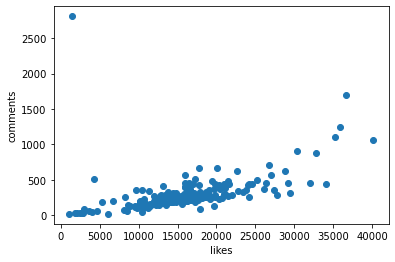

In [46]:
plt.scatter(df['likes'], df['comments'])
plt.ylabel('comments')
plt.xlabel('likes')

In [43]:
avg_views = df['views'].mean()
avg_likes= df['likes'].mean()
avg_dislikes = df['dislikes'].mean()
avg_comments = df['comments'].mean()
print(f'Promedio views: {round(avg_views,2)}')
print(f'Promedio likes: {round(avg_likes,2)}')
print(f'Promedio dislikes: {round(avg_dislikes,2)}')
print(f'Promedio comments: {round(avg_comments,2)}')

Promedio views: 409378.98
Promedio likes: 16022.93
Promedio dislikes: 1123.95
Promedio comments: 307.1


(array([15., 21., 59., 38., 23., 13.,  7.,  6.,  1.,  3.]),
 array([  11. ,  343.4,  675.8, 1008.2, 1340.6, 1673. , 2005.4, 2337.8,
        2670.2, 3002.6, 3335. ]),
 <BarContainer object of 10 artists>)

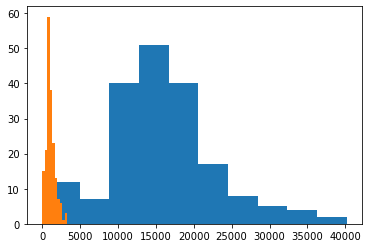

In [23]:
plt.hist(df['likes'])
plt.hist(df['dislikes'])

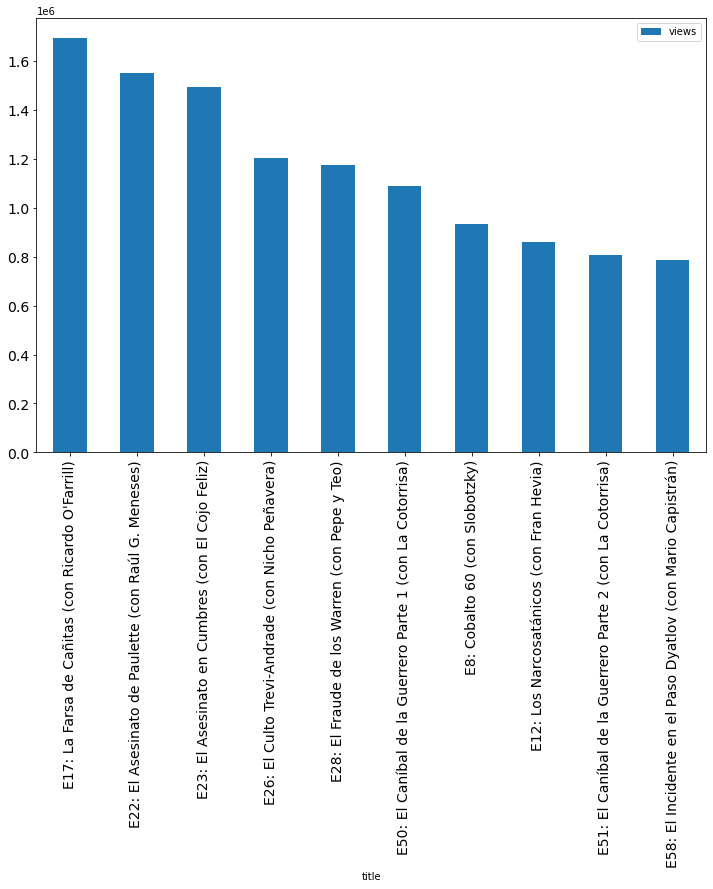

In [33]:
top10 = df.head(10)
ax = top10.plot.bar(x='title',y='views', figsize=(12,8), fontsize=14)

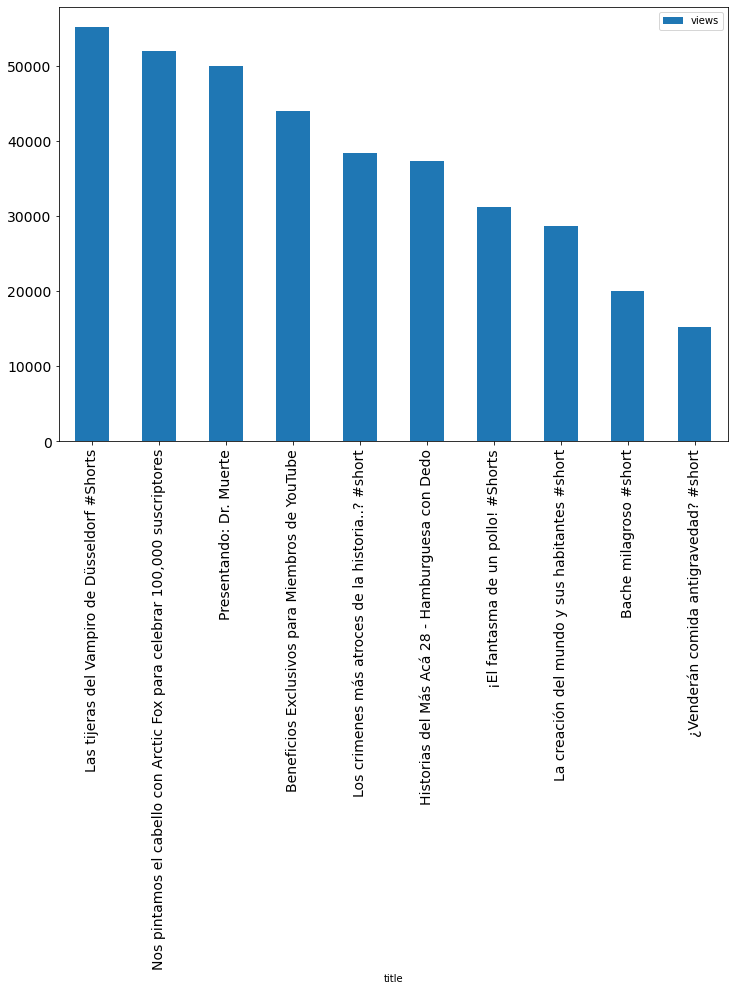

In [34]:
botton10 = df.tail(10)
ax = botton10.plot.bar(x='title',y='views', figsize=(12,8), fontsize=14)